In [41]:
install.packages("effects")

Warning message:
“package ‘effects’ is not available (for R version 3.4.1)”

In [38]:
library(lmerTest)
library(sjPlot)

ERROR: Error in library(sjPlot): there is no package called ‘sjPlot’


In [2]:
# load workspace image
load("./lme4_modelfit.RData", ex <- new.env())

# load data
df <- ex$df

In [3]:
str(df)

'data.frame':	11683 obs. of  21 variables:
 $ Answer      : Factor w/ 2 levels "0","1": 2 1 2 2 2 1 1 2 2 2 ...
 $ Block       : Factor w/ 3 levels "0","1","2": 1 2 3 1 3 1 2 3 1 2 ...
 $ CD          : num  1.14 1.14 1.14 1.14 1.14 ...
 $ Choice      : int  0 1 0 0 0 1 2 0 0 0 ...
 $ ED          : num  15.3 15.3 15.3 15.3 15.3 ...
 $ RT          : num  1.76 2.24 1.77 2.56 2.42 ...
 $ Trlnum      : int  0 33 39 38 51 2 51 46 31 6 ...
 $ conNT       : num  8.71 8.71 8.71 8.71 8.71 ...
 $ conNT_cent  : num  -0.0295 -0.0295 -0.0295 -0.0295 -0.0295 ...
 $ conNT_z     : num  -0.524 -0.524 -0.524 -0.524 -0.524 ...
 $ item_id     : Factor w/ 64 levels "0.0","1.0","10.0",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ newNT       : num  7 7 7 7 7 ...
 $ newNT_cent  : num  0.00254 0.00254 0.00254 0.00254 0.00254 ...
 $ newNT_z     : num  0.681 0.681 0.681 0.681 0.681 ...
 $ sub         : Factor w/ 32 levels "1","10","11",..: 1 1 1 12 12 23 23 23 27 27 ...
 $ task        : Factor w/ 2 levels "disc","name": 1 1 1 

In [4]:
head(df)

Answer,Block,CD,Choice,ED,RT,Trlnum,conNT,conNT_cent,conNT_z,⋯,newNT,newNT_cent,newNT_z,sub,task,task_order,ec_b2,ec_b3,ec_task,ec_taskorder
1,0,1.140978,0,15.32376,1.762020,0,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,1,disc,ver1,-1,-1,-1,1
0,1,1.140978,1,15.32376,2.242939,33,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,1,disc,ver1,1,0,-1,1
1,2,1.140978,0,15.32376,1.766368,39,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,1,disc,ver1,0,1,-1,1
1,0,1.140978,0,15.32376,2.559490,38,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,2,disc,ver1,-1,-1,-1,1
1,2,1.140978,0,15.32376,2.417423,51,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,2,disc,ver1,0,1,-1,1
0,0,1.140978,1,15.32376,1.718840,2,8.711341,-0.02945527,-0.5242762,⋯,6.996014,0.002536885,0.6807588,3,disc,ver2,-1,-1,-1,-1


# NT models

## Model summaries

In [5]:
# load fitted models
answer_bothNT <- ex$answer_bothNT
answer_bothNT2 <- ex$answer_bothNT2
answer_conNT <- ex$answer_conNT
answer_newNT <- ex$answer_newNT
answer_null <- ex$answer_null
rt_bothNT <- ex$rt_bothNT
rt_bothNT2 <- ex$rt_bothNT2
rt_conNT <- ex$rt_conNT
rt_newNT <- ex$rt_newNT
rt_null <- ex$rt_null

### Accuracies

In [22]:
summary(answer_bothNT)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Answer ~ conNT_z + newNT_z + Block + task + task_order + (conNT_z +  
    newNT_z + Block + task + task_order | sub) + (1 | item_id)
   Data: df
Control: glmerControl(optimizer = "Nelder_Mead")

     AIC      BIC   logLik deviance df.resid 
 13823.2  14088.4  -6875.6  13751.2    11647 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1387 -0.8240  0.3952  0.7116  6.1264 

Random effects:
 Groups  Name           Variance Std.Dev. Corr                               
 item_id (Intercept)    0.859397 0.92704                                     
 sub     (Intercept)    0.207903 0.45596                                     
         conNT_z        0.005702 0.07551  -0.10                              
         newNT_z        0.008913 0.09441  -0.79 -0.52                        
         Block1         0.257625 0.50757   0.09  0.50 -0.27             

In [26]:
#summary(answer_bothNT2)

In [92]:
#summary(answer_conNT)

In [94]:
#summary(answer_null)

There is no significant influence of NT measures on accuracies. The newNT predictor is only marginally significant (p <.1) in the bothNT and neNT model.

### RT

In [21]:
summary(rt_bothNT)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: RT ~ conNT_z + newNT_z + Block + task + task_order + (conNT_z +  
    newNT_z + Block + task + task_order | sub) + (1 | item_id)
   Data: df
Control: lmerControl(optimizer = "Nelder_Mead")

     AIC      BIC   logLik deviance df.resid 
 14789.5  15062.0  -7357.8  14715.5    11646 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7610 -0.7395 -0.0846  0.6727  3.7809 

Random effects:
 Groups   Name           Variance Std.Dev. Corr                               
 item_id  (Intercept)    0.016312 0.12772                                     
 sub      (Intercept)    0.302314 0.54983                                     
          conNT_z        0.001271 0.03566  -1.00                              
          newNT_z        0.003237 0.05690   0.80 -0.79                        
          Block1         0.032165 0.17935   0.86 -0.85  0.67                  
          Bloc

In [15]:
#summary(rt_bothNT2)

In [17]:
#summary(rt_conNT)

In [19]:
#summary(rt_newNT)

In [20]:
#summary(rt_null)

Both NT measures have a significant influence on reaction times. While the conNT measure leads to shorter RT, the newNT measure leads to longer RT.

## Model comparison

We do likelihood ratio tests between models with Rs anova command. Significance of difference in likelihood ratio is assessed via Chi-Square test. Since Chi-Square is nondirectional, comparing model A with B yields same result as comparing model B with A.

### Accuracies

In [24]:
# no difference between null and both
#print(anova(answer_null, answer_bothNT))

In [55]:
# null model is better than the model with newNT
#print(anova(answer_null, answer_newNT))

In [68]:
# no difference between null and conNT
#print(anova(answer_null, answer_conNT))

In [69]:
# no difference between the model with conNT and with both
#print(anova(answer_bothNT, answer_conNT))

In [70]:
#print(answer_bothnew)
#print(anova(answer_bothNT, answer_newNT))

In [29]:
# removing NT measures as RFX does not change model fit
#print(anova(answer_bothNT, answer_bothNT2))
#print(anova(answer_bothNT2, answer_bothNT))

### RT

I don't know why, but here the order of comparison sometimes influences results! (e.g. null vs newNT). Maybe because in case of null_vs_newNT, there is a Df of 0?

Overall, newNT influences RTs in that a model with newNT is better than the null model.

In [79]:
# no difference between null model and bothNT model
#print(anova(rt_null, rt_bothNT))
#print(anova(rt_bothNT, rt_null))

In [81]:
# newNT model fits better than null model
# df = zero
# order of coparison matters
#print(anova(rt_null, rt_newNT))
#print(anova(rt_newNT, rt_null))

In [25]:
#print(rt_nullcon)

In [84]:
# No difference between both and conNT model
#print(anova(rt_bothNT, rt_conNT))
#print(anova(rt_conNT, rt_bothNT))

In [87]:
#print(rt_bothnew)
#print(anova(rt_bothNT, rt_newNT))
#print(anova(rt_newNT, rt_bothNT))

In [33]:
# Removing NT measures as RFX does not change model fit
#print(anova(rt_bothNT, rt_bothNT2))
#print(anova(rt_bothNT2, rt_bothNT))

## Conclusion

The modelled neural typicality among the RI percepts explains the data better than models without this measure.

# ED and CD models

In [29]:
# load models
answer_bothD <- ex$answer_bothD
answer_ED <- ex$answer_ED
answer_CD <- ex$answer_CD

rt_bothD <- ex$rt_bothD
rt_ED <- ex$rt_ED
rt_CD <- ex$rt_CD

## Model summaries

### Accuracies

In [30]:
#summary(answer_bothD)

In [31]:
#summary(answer_ED)

In [32]:
#summary(answer_CD)

ED and CD have a significant effect on accuracies when included in the same model or individual models. (thogh ED only has marginal influence in its individual model).

Weirdly, both their parameter estimates are positive, i.e. participants are more likely to respond correctly, the greater the distance from the centroid is (plausible, because it's a measure of uniqueness), but also the greater the distance from the original is.

However, these parameters are on a log scale and should be interpreted with caution.

### RT

In [33]:
#summary(rt_bothD)

In [18]:
#summary(rt_ED)

In [20]:
#summary(rt_CD)

Again, LME4 does not assign p-values to linear models. Hence, we must rely on model comparison for assessing significance.

Not though that the ED parameter is positive, indicating longer RT for greater ED while the CD parameter is negative, indicating shorter RT with greater CD.

## Model comparison

In [34]:
# load likelihood ratio test results
answer_nullbothD <- ex$answer_nullbothD
answer_nullCD <- ex$answer_nullCD
answer_nullED <- ex$answer_nullED
answer_bothCD <- ex$answer_bothCD
answer_bothED <- ex$answer_bothED

rt_nullbothD <- ex$rt_nullbothD
rt_nullCD <- ex$rt_nullCD
rt_nullED <- ex$rt_nullED
rt_bothCD <- ex$rt_bothCD
rt_bothED <- ex$rt_bothED

### Accuracies

In [34]:
#print(answer_nullbothD)

In [35]:
#print(answer_nullCD)

In [36]:
#print(answer_nullED)

In [37]:
#print(answer_bothCD)

In [38]:
#print(answer_bothED)

The CD model is better than the null model. Else, there are no differences.

This is mostly in line with the model results, but alleviates the importance of ED (which showed a significant effect when in the same model as ED, but not in an individual model).

So we could summarize that only CD has a positive influence on accuracies.

### RT

In [39]:
#print(rt_nullbothD)

In [40]:
#print(rt_nullED)

In [41]:
#print(rt_nullCD)

In [42]:
#print(rt_bothED)

In [43]:
#print(rt_bothCD)

The ED model is better than the null model, else there are no differences.
This is interesting since when the accuracies were affected by CD instead.

# Sandbox

$item_id

$sub


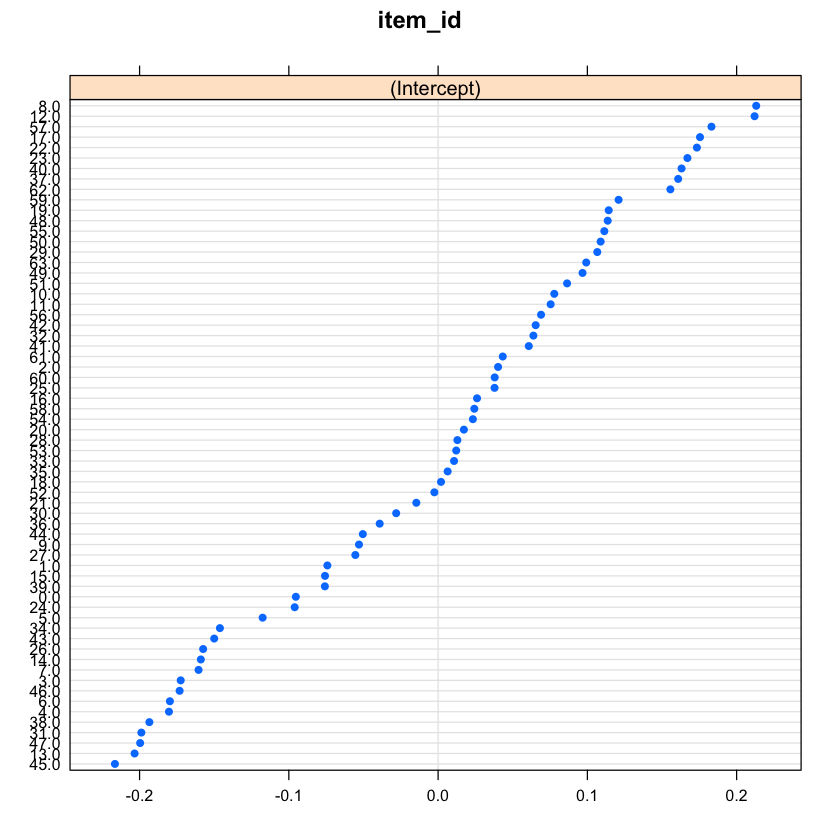

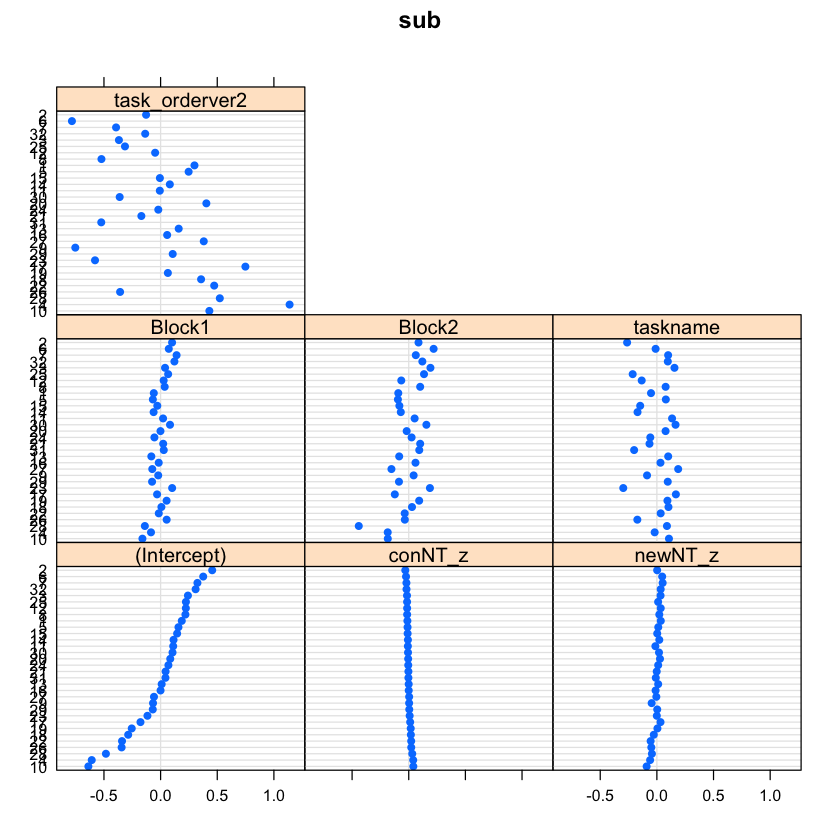

In [103]:
# plot variability of slopes across subjects and item_ids

lattice::dotplot(ranef(rt_bothNT))#, condVar=TRUE))